# Visualising Pre-training Performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# !cp base_results.csv /home/local/data/sophie/imagenet/output/
base_df = pd.read_csv("/home/local/data/sophie/imagenet/output/base_results.csv")
base_df['Weights'] = "base"
grey_df = pd.read_csv("/home/local/data/sophie/imagenet/output/grey_results.csv")
grey_df['Weights'] = "grey"
results_df = pd.concat([base_df,grey_df])

In [6]:
results_df

,Epoch,AP,Top1,Top5,Weights
0,0,0.072820,13.020,30.968,base
1,1,0.113249,19.316,41.764,base
2,2,0.139561,22.788,46.708,base
3,3,0.151343,24.398,49.160,base
4,4,0.153462,25.530,50.512,base
...,...,...,...,...,...
115,116,0.589700,73.820,91.672,grey
116,117,0.591153,73.810,91.612,grey
117,118,0.592485,73.862,91.734,grey
118,119,0.594605,73.856,91.744,grey


<Axes: xlabel='Epoch', ylabel='AP'>

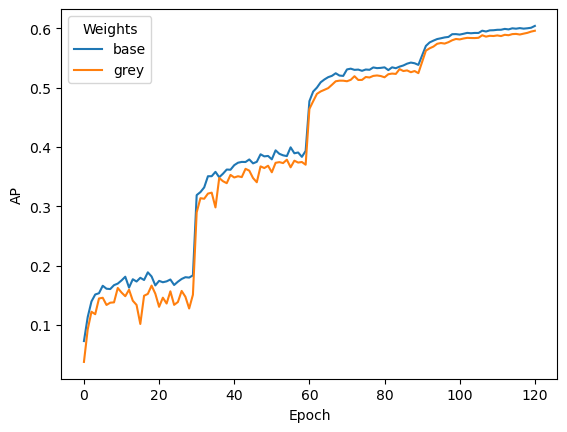

In [9]:
sns.lineplot(data=results_df, x="Epoch", y="AP", hue="Weights",markers=True)

In [74]:
long_grey = grey_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_grey['Weights'] = "Grey"

long_base = base_df[['Epoch', 'AP', 'Top1', 'Top5']].melt(id_vars='Epoch',var_name="Variable",value_name="Value")
long_base['Weights'] = "Base"

long_results = pd.concat([long_grey,long_base])
long_results.head()

,Epoch,Variable,Value,Weights
0,0,AP,0.037638,Grey
1,1,AP,0.092453,Grey
2,2,AP,0.122217,Grey
3,3,AP,0.118108,Grey
4,4,AP,0.144621,Grey


Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

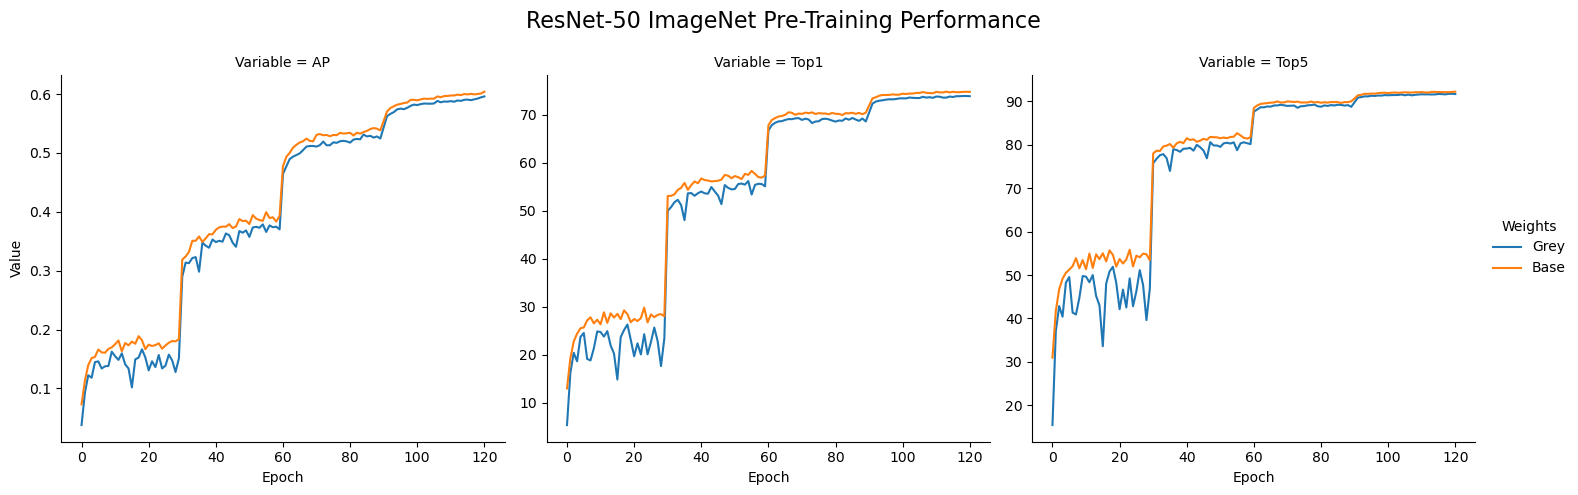

In [94]:
metricplot = sns.relplot(data=long_results, x="Epoch", y="Value", hue="Weights", col = "Variable", \
                         facet_kws={'sharey': False, 'sharex': True}, kind="line")
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')

Text(0.5, 0.98, 'ResNet-50 ImageNet Pre-Training Performance')

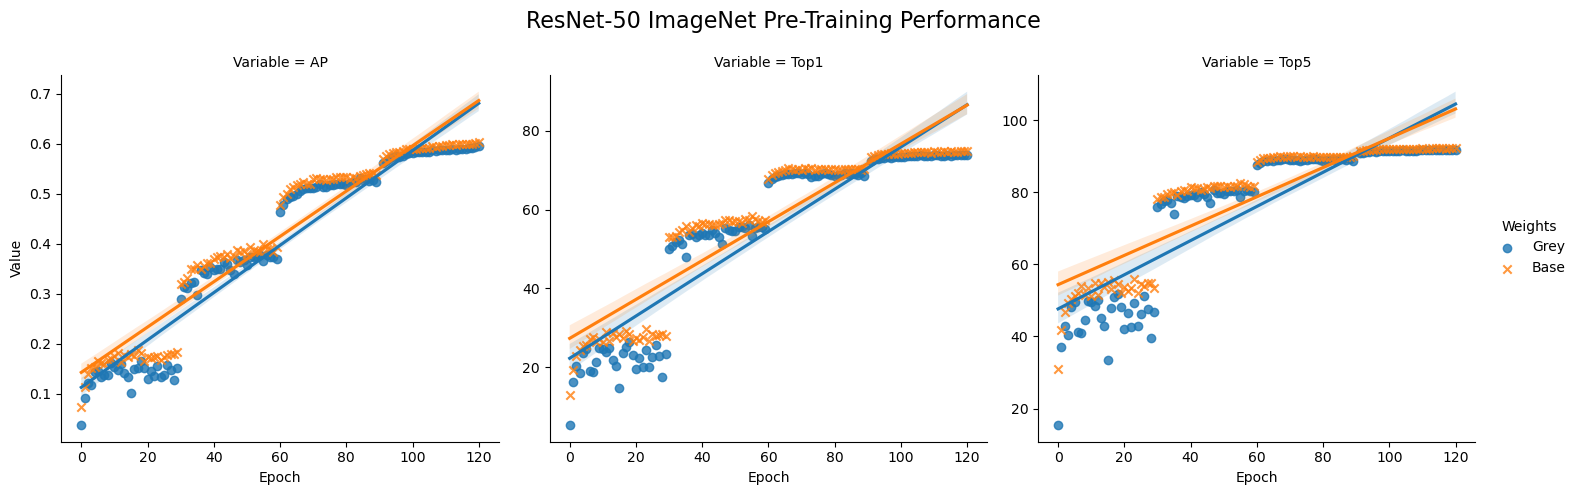

In [95]:
metricplot = sns.lmplot(data=long_results, x="Epoch", y="Value", hue="Weights", col = "Variable", \
                        facet_kws={'sharey': False, 'sharex': True},markers=['o', 'x'])
metricplot.fig.subplots_adjust(top=.85)
metricplot.fig.suptitle('ResNet-50 ImageNet Pre-Training Performance', fontsize=16,)# weight='bold')